In [2]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [22]:
df = pd.read_csv("../Log/2025_08_05_15_22/PDPT.csv")
print(len(df))
df = df.query('cbt1==1').reset_index(drop=True)
df.describe()

804020


,ball_x,ball_y,ball_z,cbt1,cbp,cbt2,cbn,return
count,677876.000000,677876.000000,677876.000000,677876.0,677876.000000,677876.000000,677876.000000,6.778760e+05
mean,1.788322,-0.108246,0.028067,1.0,0.880295,0.392063,0.073174,2.042857e+00
std,1.715311,0.464921,0.848337,0.0,0.324616,0.488211,0.260422,9.326620e-01
min,-2.480000,-0.765924,-2.480000,1.0,0.000000,0.000000,0.000000,-1.192093e-07
25%,0.996820,-0.588642,-0.350758,1.0,1.000000,0.000000,0.000000,1.678737e+00
50%,2.119979,0.020000,0.046728,1.0,1.000000,0.000000,0.000000,1.929944e+00
75%,2.674799,0.080184,0.439816,1.0,1.000000,1.000000,0.000000,3.000000e+00
max,5.480000,3.980000,2.480000,1.0,1.000000,1.000000,1.000000,3.000000e+00


<Axes: title={'center': '$Cumulative Reward$'}, xlabel='episode_block'>

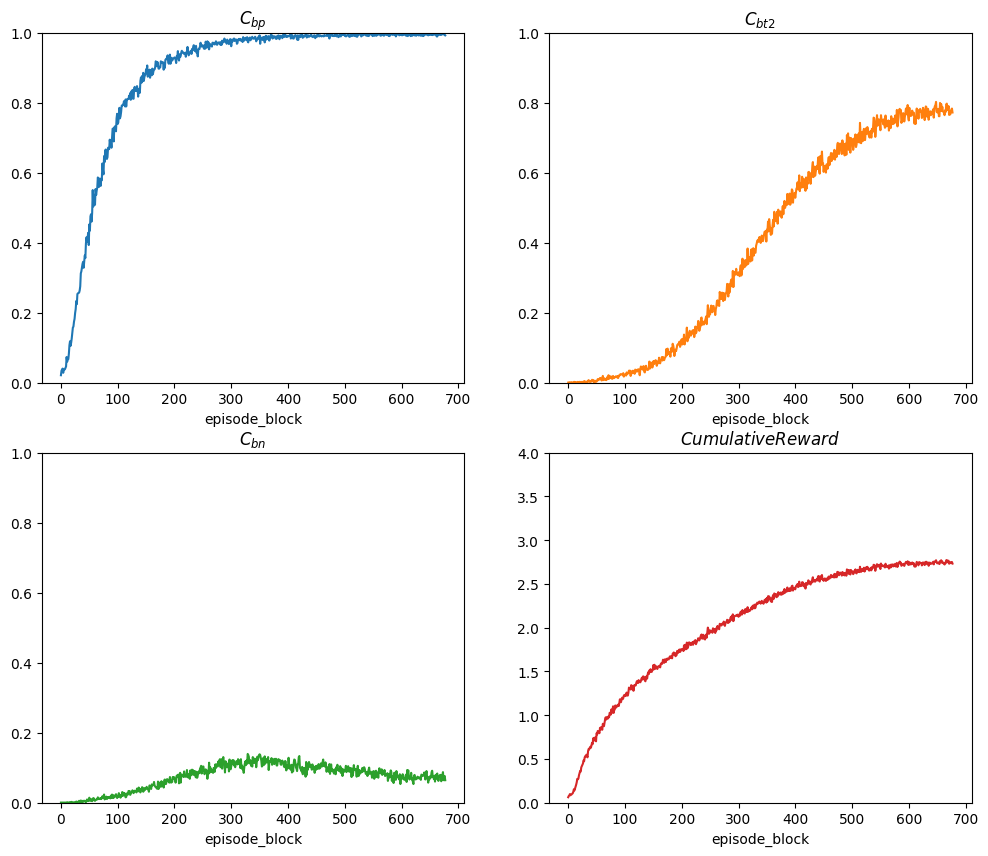

In [23]:
colors = plt.cm.tab10.colors
block_size = 1000
z = 1.96
df['episode_block'] = df.index // block_size
df_mean = df.groupby('episode_block').mean()
df_std = df.groupby('episode_block').std(ddof=1)
df_margin_of_error = z * (df_std / np.sqrt(block_size))
df_upper = df_mean + df_margin_of_error
df_lower = df_mean - df_margin_of_error
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
ax[0, 0].set_title("$C_{bp}$")
ax[0, 0].set_ylim(0, 1)
#ax[0, 0].fill_between(df_mean.index, df_lower['cbp'], df_upper['cbp'], alpha=0.3)
df_mean['cbp'].plot(ax=ax[0, 0], color=colors[0])

ax[0, 1].set_title("$C_{bt2}$")
ax[0, 1].set_ylim(0, 1)
#ax[0, 1].fill_between(df_mean.index, df_lower['cbt2'], df_upper['cbt2'], alpha=0.3)
df_mean['cbt2'].plot(ax=ax[0, 1], color=colors[1])

ax[1, 0].set_title("$C_{bn}$")
ax[1, 0].set_ylim(0, 1)
#ax[1, 0].fill_between(df_mean.index, df_lower['cbn'], df_upper['cbn'], alpha=0.3)
df_mean['cbn'].plot(ax=ax[1, 0], color=colors[2])

ax[1, 1].set_title("$Cumulative Reward$")
ax[1, 1].set_ylim(0, 4)
#ax[1, 1].fill_between(df_mean.index, df_lower['return'], df_upper['return'], alpha=0.3)
df_mean['return'].plot(ax=ax[1, 1], color=colors[3])

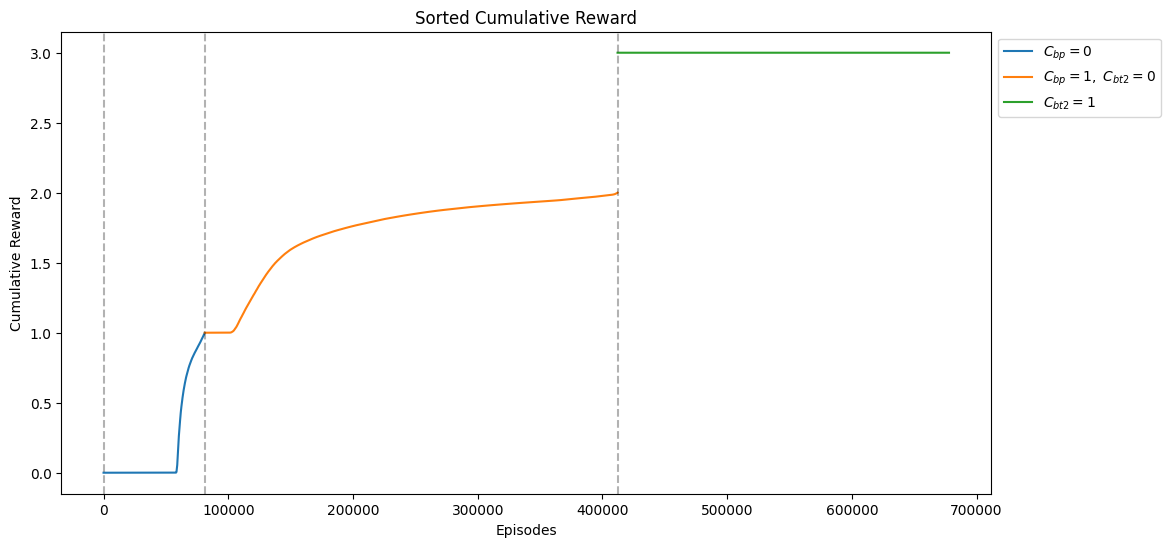

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.title("Sorted Cumulative Reward")
plt.xlabel("Episodes")
plt.ylabel("Cumulative Reward")
df_sort = df.sort_values('return').reset_index(drop=True)
df_sort.query('cbp==0')['return'].plot(label='$C_{bp}=0$')
df_sort.query('(cbp==1) & (cbt2==0)')['return'].plot(label='$C_{bp}=1,\ C_{bt2}=0$')
df_sort.query('cbt2==1')['return'].plot(label='$C_{bt2}=1$')

prev = None
for i, val in enumerate(df_sort['cbp']):
    if prev is not None and prev != val:
        ax.axvline(i, color='black', linestyle='--', alpha=0.3)
    prev = val

for i, val in enumerate(df_sort['cbt2']):
    if prev is not None and prev != val:
        ax.axvline(i, color='black', linestyle='--', alpha=0.3)
    prev = val

plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

In [7]:
x_min = min(df['ball_x'])
x_max = max(df['ball_x'])

y_min = min(df['ball_z'])
y_max = max(df['ball_z'])

print(x_min)
print(x_max)
print(y_min)
print(y_max)

-3.489248
3.48
-2.4848
2.486575


In [11]:
desc = pd.read_csv("../Log/2025_08_16_18_26/Description.csv")
desc

,TargetAreaCenterX,TargetAreaCenterY,TargetAreaCenterZ,TargetAreaExtentsX,TargetAreaExtentsY,TargetAreaExtentsZ,NetCenterX,NetCenterY,NetCenterZ,NetExtentsX,NetExtentsY,NetExtentsZ
0,0.685,0.781,0,0.685,0.02,0.7625,0,0.83625,0,0.0075,0.07625,0.85


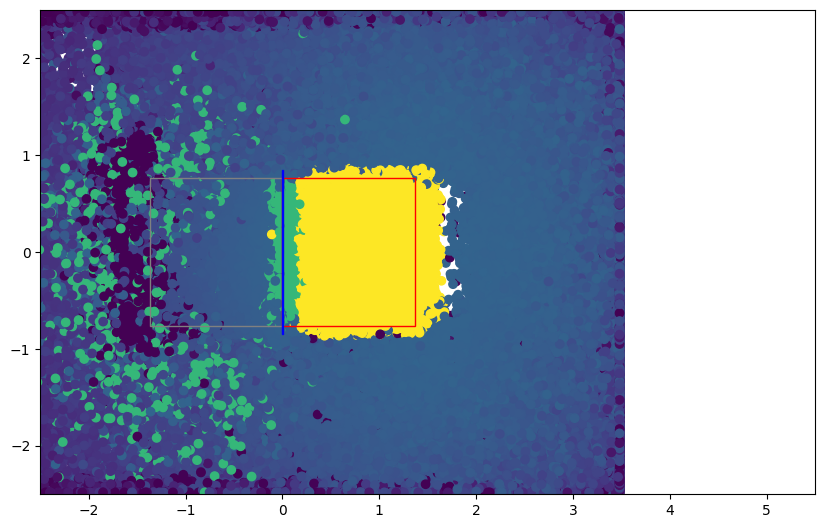

In [12]:

colors = plt.cm.tab10.colors
center_x = desc['TargetAreaCenterX'][0]
center_y = desc['TargetAreaCenterZ'][0]
extents_x = desc['TargetAreaExtentsX'][0]
extents_y = desc['TargetAreaExtentsZ'][0]

net_center_x = desc['NetCenterX'][0]
net_center_y = desc['NetCenterZ'][0]
net_extents_x = desc['NetExtentsX'][0]
net_extents_y = desc['NetExtentsZ'][0]

df_plot = df.query('cbp==1')
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(df_plot['ball_x'], df_plot['ball_z'], cmap='viridis', c=df_plot['return'])
ax.set_xlim(-2.5, 5.5)
ax.set_ylim(-2.5, 2.5)
ax.set_aspect('equal')
ax.add_patch(
   patches.Rectangle(
      (center_x - 3 * extents_x, center_y - extents_y),                   # (x, y)
      2 * extents_x, 2 * extents_y,                     # width, height
      edgecolor = 'Gray',
      facecolor = colors[0],
      fill=False
   ))

ax.add_patch(
   patches.Rectangle(
      (center_x - extents_x, center_y - extents_y),                   # (x, y)
      2 * extents_x, 2 * extents_y,                     # width, height
      edgecolor = 'Red',
      facecolor = colors[0],
      fill=False
   ))

ax.add_patch(
   patches.Rectangle(
      (net_center_x - net_extents_x, net_center_y - net_extents_y),                   # (x, y)
      2 * net_extents_x, 2 * net_extents_y,                     # width, height
      edgecolor = 'Blue',
      facecolor = colors[0],
      fill=False
   ))


In [5]:
desc = pd.read_csv("../Log/2025_08_14_12_11/Description.csv")
desc

,TargetAreaCenterX,TargetAreaCenterY,TargetAreaCenterZ,TargetAreaExtentsX,TargetAreaExtentsY,TargetAreaExtentsZ,NetCenterX,NetCenterY,NetCenterZ,NetExtentsX,NetExtentsY,NetExtentsZ
0,2.37,0.781,0,0.685,0.02,0.7625,1.685,0.83625,0,0.0075,0.07625,0.85


In [8]:
center_x

0    2.37
Name: TargetAreaCenterX, dtype: float64

0.09814414921227874
0.07920744205945655


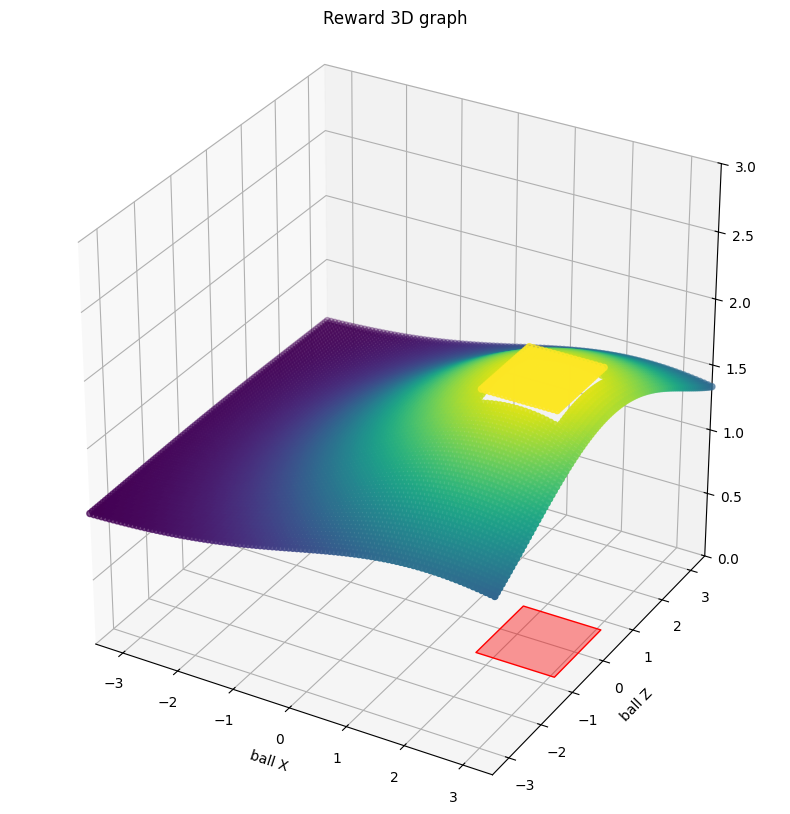

In [38]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

X = np.linspace(-3.5, 3.5, 100)
Y = np.linspace(-3.5, 3.5, 100)
X, Y = np.meshgrid(X, Y)
center_x = desc['TargetAreaCenterX'][0]
center_y = desc['TargetAreaCenterZ'][0]
extents_x = desc['TargetAreaExtentsX'][0]
extents_y = desc['TargetAreaExtentsZ'][0]
x_min, x_max = center_x - extents_x, center_x + extents_x  # 탁구대 가로 (2.74m)
y_min, y_max = center_y - extents_y, center_y + extents_y     # 탁구대 세로 (1.525m)
z_base = 0 # z축이 위쪽이면 y_base가 0으로 간주됨 (z=0은 y=0)

def get_reward(X, Y, center_x, center_y, extents_x, extents_y):
    in_x = np.abs(X - center_x) <= extents_x
    in_y = np.abs(Y - center_y) <= extents_y
    sqr_dist_x = (X - center_x) ** 2
    sqr_dist_y = (Y - center_y) ** 2
    eps = 0.01
    d_x = 10.0 * extents_x
    d_y = 10.0 * extents_y
    a_x = -np.log(eps) / (d_x ** 2)
    a_y = -np.log(eps) / (d_y ** 2)
    print(a_x)
    print(a_y)
    
    reward = 1.0 + np.exp(-a_x * sqr_dist_x -a_y * sqr_dist_y) * ~(in_x & in_y)
    reward += (in_x & in_y) 
    return reward

Z = get_reward(X, Y, center_x, center_y, extents_x, extents_y)

    
    
ax.scatter(X, Y, Z, c=Z)
# 사각형 꼭짓점 정의 (x, y, z)
table_verts = [[
    (x_min, y_max, z_base),
    (x_min, y_min, z_base),
    (x_max, y_min, z_base),
    (x_max, y_max, z_base)
]]

# 사각형 추가
table = Poly3DCollection(table_verts, color='red', alpha=0.4)
ax.set_title("Reward 3D graph")
ax.add_collection3d(table)
ax.set_xlim(-3.5, 3.5)
ax.set_ylim(-3.5, 3.5)
ax.set_zlim(0, 3)
ax.set_ylabel("ball Z")
ax.set_xlabel("ball X")
ax.set_box_aspect([1, 1, 1])

In [70]:
df_plot['ball_x'].max()

np.float64(5.48)

785997


Text(0.5, 0, 'ball X')

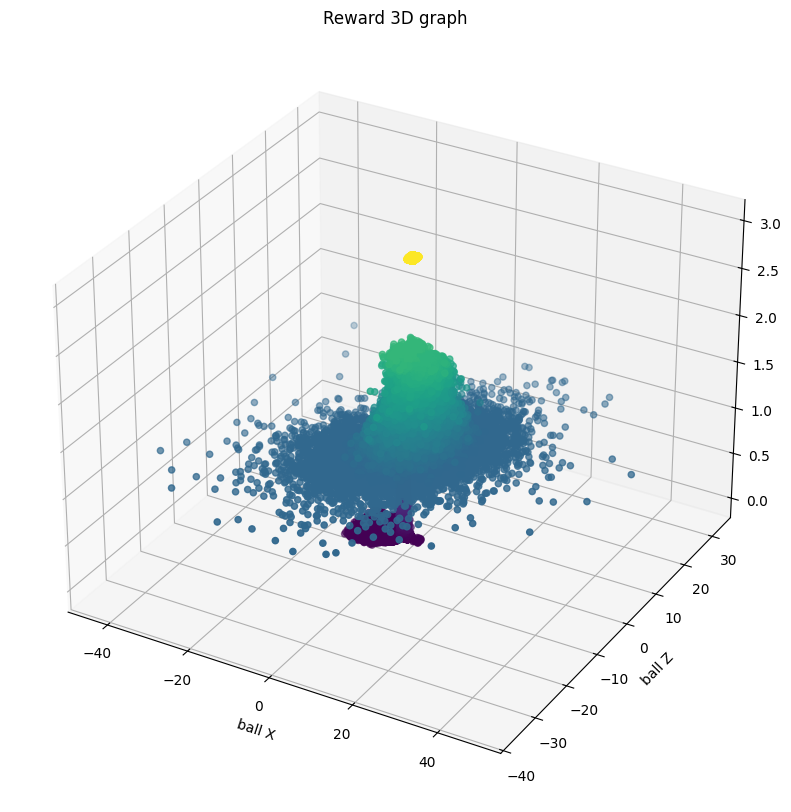

In [78]:
df = pd.read_csv("../Log/2025_08_14_12_11/PDPT.csv")
print(len(df))
df = df.query('cbt1==1').reset_index(drop=True)
df_plot = df



from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

center_x = desc['TargetAreaCenterX'][0]
center_y = desc['TargetAreaCenterZ'][0]
extents_x = desc['TargetAreaExtentsX'][0]
extents_y = desc['TargetAreaExtentsZ'][0]
x_min, x_max = center_x - extents_x, center_x + extents_x  # 탁구대 가로 (2.74m)
y_min, y_max = center_y - extents_y, center_y + extents_y     # 탁구대 세로 (1.525m)
z_base = 0 # z축이 위쪽이면 y_base가 0으로 간주됨 (z=0은 y=0)


    
ax.scatter(df_plot['ball_x'], df_plot['ball_z'], df_plot['return'], c=df_plot['return'])
# 사각형 꼭짓점 정의 (x, y, z)
table_verts = [[
    (x_min, y_max, z_base),
    (x_min, y_min, z_base),
    (x_max, y_min, z_base),
    (x_max, y_max, z_base)
]]

# 사각형 추가
table = Poly3DCollection(table_verts, color='red', alpha=0.4)
ax.set_title("Reward 3D graph")
ax.add_collection3d(table)
#ax.set_zlim(0, 3)
ax.set_ylabel("ball Z")
ax.set_xlabel("ball X")
#ax.set_box_aspect([1, 1, 1])

804020
677876


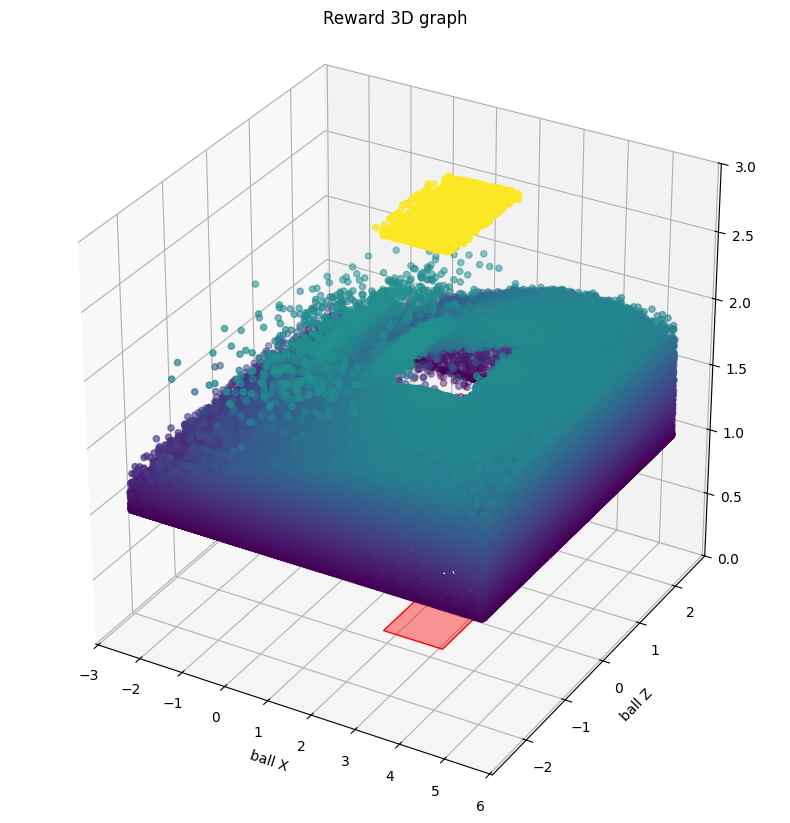

In [67]:
df = pd.read_csv("../Log/2025_08_05_15_22/PDPT.csv")
print(len(df))
df = df.query('cbt1==1').reset_index(drop=True)
df
print(len(df))



from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

X = np.linspace(-3.5, 3.5, 100)
Y = np.linspace(-3.5, 3.5, 100)
X, Y = np.meshgrid(X, Y)
center_x = desc['TargetAreaCenterX'][0]
center_y = desc['TargetAreaCenterZ'][0]
extents_x = desc['TargetAreaExtentsX'][0]
extents_y = desc['TargetAreaExtentsZ'][0]
x_min, x_max = center_x - extents_x, center_x + extents_x  # 탁구대 가로 (2.74m)
y_min, y_max = center_y - extents_y, center_y + extents_y     # 탁구대 세로 (1.525m)
z_base = 0 # z축이 위쪽이면 y_base가 0으로 간주됨 (z=0은 y=0)


    
ax.scatter(df_plot['ball_x'], df_plot['ball_z'], df_plot['return'], c=df_plot['return'])
# 사각형 꼭짓점 정의 (x, y, z)
table_verts = [[
    (x_min, y_max, z_base),
    (x_min, y_min, z_base),
    (x_max, y_min, z_base),
    (x_max, y_max, z_base)
]]

# 사각형 추가
table = Poly3DCollection(table_verts, color='red', alpha=0.4)
ax.set_title("Reward 3D graph")
ax.add_collection3d(table)
ax.set_zlim(0, 3)
ax.set_ylabel("ball Z")
ax.set_xlabel("ball X")
ax.set_box_aspect([1, 1, 1])

In [2]:
import pandas as pd
df = pd.read_csv("../Log/2025_08_05_15_22/PDPT.csv")
df.query('cbt1==1').describe()

,ball_x,ball_y,ball_z,cbt1,cbp,cbt2,cbn,return
count,677876.000000,677876.000000,677876.000000,677876.0,677876.000000,677876.000000,677876.000000,6.778760e+05
mean,1.788322,-0.108246,0.028067,1.0,0.880295,0.392063,0.073174,2.042857e+00
std,1.715311,0.464921,0.848337,0.0,0.324616,0.488211,0.260422,9.326620e-01
min,-2.480000,-0.765924,-2.480000,1.0,0.000000,0.000000,0.000000,-1.192093e-07
25%,0.996820,-0.588642,-0.350758,1.0,1.000000,0.000000,0.000000,1.678737e+00
50%,2.119979,0.020000,0.046728,1.0,1.000000,0.000000,0.000000,1.929944e+00
75%,2.674799,0.080184,0.439816,1.0,1.000000,1.000000,0.000000,3.000000e+00
max,5.480000,3.980000,2.480000,1.0,1.000000,1.000000,1.000000,3.000000e+00


In [3]:
df = pd.read_csv("../Log/2025_08_14_12_11/PDPT.csv")
df.query('cbt1==1').describe()

,ball_x,ball_y,ball_z,cbt1,cbp,cbt2,cbn,return,steps
count,626173.000000,626173.000000,626173.000000,626173.0,626173.000000,626173.000000,626173.000000,6.261730e+05,626173.000000
mean,1.514516,0.163232,0.050798,1.0,0.826482,0.216673,0.072082,1.718382e+00,72.779186
std,2.810422,0.799266,1.698033,0.0,0.378694,0.411978,0.258624,9.149169e-01,21.450233
min,-43.313310,-0.765924,-35.888040,1.0,0.000000,0.000000,0.000000,-1.192093e-07,0.000000
25%,0.288386,-0.765924,-0.446889,1.0,1.000000,0.000000,0.000000,1.275288e+00,59.000000
50%,1.657500,0.780000,0.054348,1.0,1.000000,0.000000,0.000000,1.831130e+00,74.000000
75%,2.692915,0.818013,0.572524,1.0,1.000000,0.000000,0.000000,1.961872e+00,87.000000
max,47.953850,1.885287,31.767690,1.0,1.000000,1.000000,1.000000,3.000000e+00,149.000000


In [77]:
df.query('cbt1==1').describe()

,ball_x,ball_y,ball_z,cbt1,cbp,cbt2,cbn,return,steps
count,626173.000000,626173.000000,626173.000000,626173.0,626173.000000,626173.000000,626173.000000,6.261730e+05,626173.000000
mean,1.514516,0.163232,0.050798,1.0,0.826482,0.216673,0.072082,1.718382e+00,72.779186
std,2.810422,0.799266,1.698033,0.0,0.378694,0.411978,0.258624,9.149169e-01,21.450233
min,-43.313310,-0.765924,-35.888040,1.0,0.000000,0.000000,0.000000,-1.192093e-07,0.000000
25%,0.288386,-0.765924,-0.446889,1.0,1.000000,0.000000,0.000000,1.275288e+00,59.000000
50%,1.657500,0.780000,0.054348,1.0,1.000000,0.000000,0.000000,1.831130e+00,74.000000
75%,2.692915,0.818013,0.572524,1.0,1.000000,0.000000,0.000000,1.961872e+00,87.000000
max,47.953850,1.885287,31.767690,1.0,1.000000,1.000000,1.000000,3.000000e+00,149.000000
